In [546]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



x = pd.read_csv("desktop/Temperature_Data.csv")
x = x.sort_values(by="Date")
x["Year"], x["Date-Month"] = zip(*x["Date"].apply(lambda x: (x[:4], x[5:])))
x = x[x["Date-Month"]!="02-29"]
x_min = x[(x["Element"]=="TMIN") & (x["Year"]!="2015")].groupby("Date-Month").agg({"Data_Value":np.min})
x_max = x[(x["Element"]=="TMAX") & (x["Year"]!= "2015")].groupby("Date-Month").agg({"Data_Value":np.max})

x_2015_min = x[(x["Element"]=="TMIN") & (x["Year"]=="2015")].groupby("Date-Month").agg({"Data_Value":np.min})
x_2015_max = x[(x["Element"]=="TMAX") & (x["Year"]=="2015")].groupby("Date-Month").agg({"Data_Value":np.max})


broken_low = pd.merge(x_min, x_2015_min, how="outer", on="Date-Month")
broken_high = pd.merge(x_max, x_2015_max, how="outer", on="Date-Month")

broken_low.rename(columns={"Data_Value_x":"2005-2014", "Data_Value_y":"2015"}, inplace=True)
broken_high.rename(columns={"Data_Value_x":"2005-2014", "Data_Value_y":"2015"},inplace=True)

broken_high["Difference"] = broken_high["2005-2014"]-broken_high["2015"]
broken_low["Difference"] = broken_low["2005-2014"]-broken_low["2015"]
for i in range(len(broken_high["Difference"])):
    if broken_high["Difference"][i] >0:
        broken_high.iat[i,2] = np.nan
    else:
        broken_high.iat[i,2] = broken_high["2015"][i]
        
for i in range(len(broken_low["Difference"])):
    if broken_low["Difference"][i]<0:
        broken_low.iat[i,2] = np.nan
    else:
        broken_low.iat[i,2] = broken_low["2015"][i]
        
broken_low.head(5)

,2005-2014,2015,Difference
Date-Month,,,
01-01,-420,NaN,NaN
01-02,-439,NaN,NaN
01-03,-436,-487.0,-487.0
01-04,-404,-482.0,-482.0
01-05,-429,-455.0,-455.0


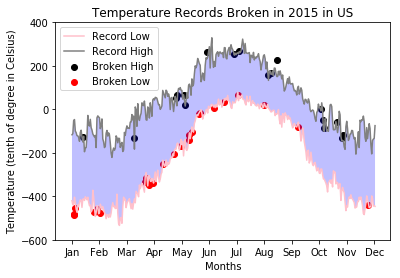

In [582]:
plt.figure()
plt.plot(broken_low["2005-2014"], c="pink", label="Record Low")
plt.plot(broken_high["2005-2014"], c="grey", label="Record High")
plt.scatter(broken_high.index, broken_high["Difference"], c="black",label="Broken High")
plt.scatter(broken_low.index, broken_low["Difference"], c="red", label="Broken Low" )
plt.xticks(range(0,len(broken_low),33), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec')) 

plt.gca().fill_between(range(len(broken_low)),broken_high["2005-2014"], broken_low["2005-2014"], facecolor="blue", alpha = 0.25)
plt.xlabel("Months")
plt.ylabel("Temperature (tenth of degree in Celsius)")
plt.ylim(-600, 400)
plt.title("Temperature Records Broken in 2015 in US")
plt.legend()
